In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Load the Titanic dataset
data = pd.read_csv('train.csv')

### Handle Missing Values

In [8]:
# Checking missing values in the dataset
print("Missing values:\n", data.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Fill missing values in 'Age' with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10880\3134929415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [12]:
# Fill missing values in 'Embarked' with the most frequent value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10880\2797269292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [14]:
# Drop the 'Cabin' column as it has too many missing values
data.drop('Cabin', axis=1, inplace=True)

In [16]:
# Check again for missing values
print("Missing values after filling:\n", data.isnull().sum())

Missing values after filling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Handle Outliers

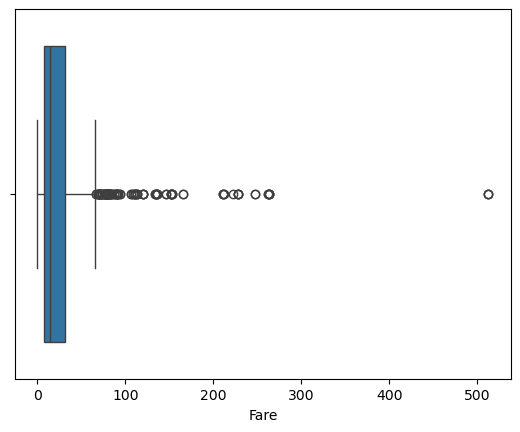

In [22]:
# Visualizing outliers in the 'Fare' column
sns.boxplot(x=data['Fare'])
plt.show()

In [24]:
# Capping 'Fare' to remove extreme outliers
upper_limit = data['Fare'].quantile(0.95)
data['Fare'] = np.where(data['Fare'] > upper_limit, upper_limit, data['Fare'])

###  Normalize or Scale Features

In [27]:
# Selecting relevant features for scaling (e.g., 'Age', 'Fare')
features_to_scale = ['Age', 'Fare']

In [29]:
# Standardizing the selected features
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

### Data Encoding (Converting categorical features into numerical format)

In [32]:
# Convert 'Sex' into numerical format (0 for female, 1 for male)
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [34]:
# Convert 'Embarked' into numerical format using One-Hot Encoding
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

### Split Data into Training and Testing Sets

In [37]:
# Define X (features) and y (target)
X = data.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = data['Survived']

In [39]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Display shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 8)
Testing set shape: (179, 8)


In [43]:
# Display first few rows of the processed training data
X_train.head()

Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S
331       1    1  1.240235      0      0  0.026688       False        True
733       2    1 -0.488887      0      0 -0.503976       False        True
382       3    1  0.202762      0      0 -0.677726       False        True
704       3    1 -0.258337      1      0 -0.680150       False        True
813       3    0 -1.795334      4      2  0.121694       False        True